In [1]:
!pip install xgboost
!pip install dask[delayed] dask-ml
!pip install scikit-mdr skrebate

     |████████████████████████████████| 133kB 3.5MB/s 
  Created wheel for scikit-mdr: filename=scikit_MDR-0.4.4-cp36-none-any.whl size=14639 sha256=fc6642930ae6dcf504684d2a99e00fc0378b4ecf58d38dd7e244eee4467f5df6
  Stored in directory: /root/.cache/pip/wheels/ee/50/91/9d48f7807ff574cdbf8f82fc65b7075b23acc9106d3cced38f
  Created wheel for skrebate: filename=skrebate-0.6-cp36-none-any.whl size=29329 sha256=ecff956bad93363027b7908e4c13bff954c795a50e4dcb1d33360c048b9a75de
  Stored in directory: /root/.cache/pip/wheels/f5/99/36/c827bcfa6852c6d068895b2723c57cea84f93642270c6dc05c
Successfully built scikit-mdr skrebate


In [0]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import seaborn as sns

In [4]:
df = pd.read_csv('data.csv', delimiter=',')
df.head()

,user_id,item_id,dow,hod,category_id,cusine_id,restaurant_id,item_count
0,-6088859261566846925,601d4dc5-2ad,7,3,9c64431e-79f,fb8b5b7f-013,706247b3-86e,1.0
1,-4662982070704311223,af48a23f-f80,7,2,a989cb37-db5,8631ea96-a78,ea90883c-a2f,1.0
2,-4849981472186386714,bab8cfae-930,1,1,4f31b9ea-059,5aa1a680-942,d9ab8a13-380,1.0
3,-5400975689533971605,3ae9d553-282,4,0,37d510f8-745,c9aa3993-86f,0b8d021a-c5c,1.0
4,4810905585891548302,3d673534-8f8,3,1,4264559d-470,5aa1a680-942,5772716f-1f3,1.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


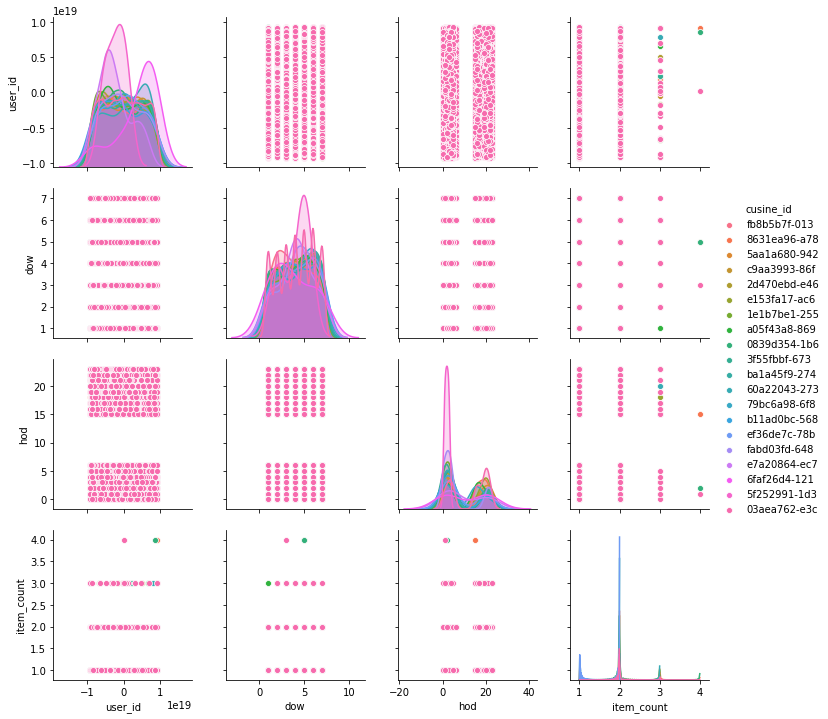

In [7]:
sns.pairplot(df, hue='cusine_id', size=2.5);

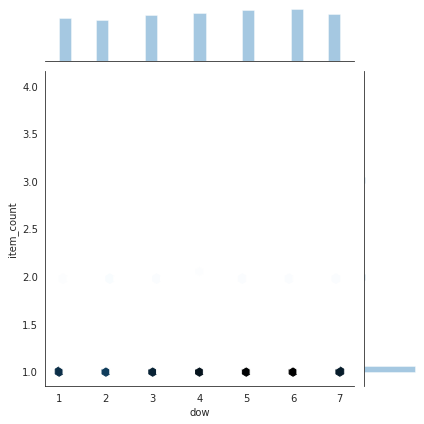

In [10]:
with sns.axes_style('white'):
    sns.jointplot("dow", "item_count", data=df, kind='hex')

In [11]:
df = df.dropna(axis = 0, how ='any') 
df_back = df
df = df[['dow','hod','category_id']]
df.head()

,dow,hod,category_id
0,7,3,9c64431e-79f
1,7,2,a989cb37-db5
2,1,1,4f31b9ea-059
3,4,0,37d510f8-745
4,3,1,4264559d-470


In [12]:
df['category_id'] = df['category_id'].apply(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
labelencoder = LabelEncoder()
df.iloc[:,2] = labelencoder.fit_transform(df.iloc[:,2])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [14]:
df['category_id'].max(axis=0)

1737

In [15]:
kmeans = KMeans(n_clusters=50,init='k-means++')
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_


In [17]:
df['clusters'] = labels

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_back.head()

,user_id,item_id,dow,hod,category_id,cusine_id,restaurant_id,item_count
0,-6088859261566846925,601d4dc5-2ad,7,3,9c64431e-79f,fb8b5b7f-013,706247b3-86e,1.0
1,-4662982070704311223,af48a23f-f80,7,2,a989cb37-db5,8631ea96-a78,ea90883c-a2f,1.0
2,-4849981472186386714,bab8cfae-930,1,1,4f31b9ea-059,5aa1a680-942,d9ab8a13-380,1.0
3,-5400975689533971605,3ae9d553-282,4,0,37d510f8-745,c9aa3993-86f,0b8d021a-c5c,1.0
4,4810905585891548302,3d673534-8f8,3,1,4264559d-470,5aa1a680-942,5772716f-1f3,1.0


In [19]:
df_back['cusine_id'] = df_back['cusine_id'].apply(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
labelencoder = LabelEncoder()
df_back.iloc[:,5] = labelencoder.fit_transform(df_back.iloc[:,5])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [21]:
df.head()

,dow,hod,category_id,clusters
0,7,3,1044,20
1,7,2,1145,21
2,1,1,510,24
3,4,0,354,1
4,3,1,418,32


In [0]:
df_back = df_back.drop(['dow','hod','category_id'], axis=1)

In [0]:
df_back['dow'] = df['dow'].values
df_back['hod'] = df['hod'].values
df_back['category_id'] = df['category_id'].values
df_back['clusters'] = df['clusters'].values

In [24]:
df_back['cusine_id'].max(axis=0)

19

In [25]:
df_back.head()

,user_id,item_id,cusine_id,restaurant_id,item_count,dow,hod,category_id,clusters
0,-6088859261566846925,601d4dc5-2ad,19,706247b3-86e,1.0,7,3,1044,20
1,-4662982070704311223,af48a23f-f80,10,ea90883c-a2f,1.0,7,2,1145,21
2,-4849981472186386714,bab8cfae-930,5,d9ab8a13-380,1.0,1,1,510,24
3,-5400975689533971605,3ae9d553-282,14,0b8d021a-c5c,1.0,4,0,354,1
4,4810905585891548302,3d673534-8f8,5,5772716f-1f3,1.0,3,1,418,32


In [0]:
X = df_back.iloc[:,5:9].values
Y = df_back.iloc[:,2:3].values

In [27]:
from keras.utils import to_categorical

# Y = to_categorical(Y)

Using TensorFlow backend.


In [28]:
Y

array([[19],
       [10],
       [ 5],
       ...,
       [ 0],
       [ 0],
       [ 0]])

In [0]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# X = sc.fit_transform(X)
# X

In [0]:
# X.shape

In [0]:
# sc1 = StandardScaler()
# Y = sc.fit_transform(Y)
# Y

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [30]:
X_train

array([[   7,   23, 1161,    0],
       [   1,    3,  483,   22],
       [   2,    5,  178,   40],
       ...,
       [   2,    2, 1128,   21],
       [   6,    2, 1654,   37],
       [   5,    6, 1598,   44]])

In [0]:
import numpy as np
import pandas as pd
from sklearn.cluster import FeatureAgglomeration
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

In [0]:

tX = df_back.iloc[:,5:9].values
tY = df_back.iloc[:,2:3].values

training_features, testing_features, training_target, testing_target = \
            train_test_split(tX, tY.ravel(), random_state=42, test_size=0.2)

exported_pipeline = make_pipeline(
    RFE(estimator=ExtraTreesClassifier(criterion="gini", max_features=0.1, n_estimators=100), step=0.55),
    FeatureAgglomeration(affinity="l2", linkage="average"),
    XGBClassifier(learning_rate=0.5, max_depth=7, min_child_weight=1, n_estimators=100, nthread=1, subsample=0.55)
)


exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features) 

In [33]:
from sklearn.metrics import confusion_matrix

result = confusion_matrix(testing_target, results)
result[3]

array([ 7,  0,  2, 99,  0,  1,  0,  0,  0,  0,  0,  0, 10,  0,  1,  0,  0,
        1,  0])

In [36]:
#compare output

for i in range(20):
	print("X=%s, predicted=%s" % (testing_target[i], results[i]))

X=0, predicted=0
X=0, predicted=0
X=13, predicted=0
X=0, predicted=0
X=7, predicted=7
X=0, predicted=0
X=0, predicted=0
X=3, predicted=3
X=0, predicted=0
X=0, predicted=0
X=19, predicted=19
X=9, predicted=9
X=18, predicted=18
X=0, predicted=0
X=0, predicted=0
X=0, predicted=0
X=0, predicted=0
X=5, predicted=1
X=0, predicted=0
X=3, predicted=3


In [0]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, results)

In [0]:
# for i in range(len(X_test)):
# 	print("X=%s, Predicted=%s" % (X_test[i], outTree[i]))